In [1]:
import os
from methods.preprocessing import *
from methods.image_enhancement import *
from methods.ml import *
from methods.cnn import *

In [2]:
test_dir = "../data/fer-2013-data/test"
for dirpath,dirname,filenames in os.walk(test_dir):
    print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath[22:]}")

There are 7 directories and 0 images in test
There are 0 directories and 958 images in test\angry
There are 0 directories and 111 images in test\disgust
There are 0 directories and 1024 images in test\fear
There are 0 directories and 1774 images in test\happy
There are 0 directories and 1233 images in test\neutral
There are 0 directories and 1247 images in test\sad
There are 0 directories and 831 images in test\surprise


In [3]:
data_gen = create_data_gen()
validation_generator = data_gen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical"
)

Found 7178 images belonging to 7 classes.


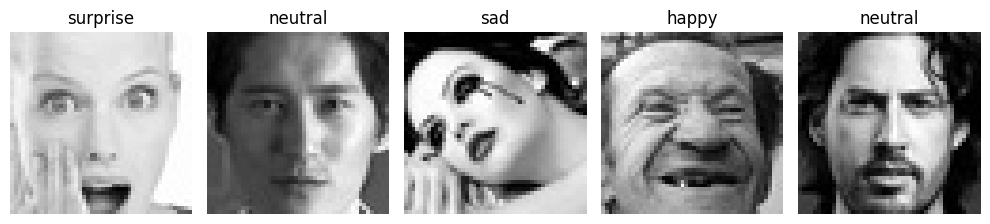

In [4]:
label_map = (validation_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items())

images, labels = next(validation_generator)
plot_example_images(images[:5], labels[:5], label_map)

# ML Models

In [ ]:
images_test, labels_test = load_dataset(test_dir)
features_test = extract_features(images_test)

X_test = scaler.transform(features_test)
y_test = np.array(labels_test)